# Introduction

For this assignment I chose the employee attrition dataset. I will use this dataset to predict the Attrition of employees.
I picked this dataset because I find it interesting to see what factors affect Attrition.

I decided to use the variables: Age, Department, DistanceFromHome, EnvironmentSatisfaction, Gender, JobRole, JobSatisfaction, MonthlyIncome, OverTime, PerformanceRating, RelationshipSatisfaction, TotalWorkingYears, WorkLifeBalance as independent variables and Attrition as the dependent variable.

I've chosen these specific variables because I think that they might affect Attrition the most.

In [1]:
import pandas as pd
import statistics as st
import seaborn as sb
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Lets take a look on what kind of data we have.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In order to make the data more readable, I will create a subset containing only the columns that I want to use.

In [4]:
employee_attr = df[["Age", "Department", "DistanceFromHome", "EnvironmentSatisfaction", 
                         "Gender", "JobSatisfaction", 
                         "MonthlyIncome", "OverTime", "PerformanceRating", 
                         "RelationshipSatisfaction", "TotalWorkingYears", "WorkLifeBalance", "Attrition"]]
employee_attr.head(50)

,Age,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,Attrition
0,41,Sales,1,2,Female,4,5993,Yes,3,1,8,1,Yes
1,49,Research & Development,8,3,Male,2,5130,No,4,4,10,3,No
2,37,Research & Development,2,4,Male,3,2090,Yes,3,2,7,3,Yes
3,33,Research & Development,3,4,Female,3,2909,Yes,3,3,8,3,No
4,27,Research & Development,2,1,Male,2,3468,No,3,4,6,3,No
5,32,Research & Development,2,4,Male,4,3068,No,3,3,8,2,No
6,59,Research & Development,3,3,Female,1,2670,Yes,4,1,12,2,No
7,30,Research & Development,24,4,Male,3,2693,No,4,2,1,3,No
8,38,Research & Development,23,4,Male,3,9526,No,4,2,10,3,No
9,36,Research & Development,27,3,Male,3,5237,No,3,2,17,2,No


In [5]:
employee_attr["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

I decided on these columns because I believe that these columns have the highest chance to impact the Attrition of employees. Columns representing id's and columns I believe to be irrelevant/redundant have been left out.

# Data cleaning

Now that we have the columns I want, I can start cleaning the data

In [6]:
employee_attr = employee_attr[(employee_attr["MonthlyIncome"] <= 10000) & (employee_attr["TotalWorkingYears"] > 0)]
employee_attr.head(50)

,Age,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,Attrition
0,41,Sales,1,2,Female,4,5993,Yes,3,1,8,1,Yes
1,49,Research & Development,8,3,Male,2,5130,No,4,4,10,3,No
2,37,Research & Development,2,4,Male,3,2090,Yes,3,2,7,3,Yes
3,33,Research & Development,3,4,Female,3,2909,Yes,3,3,8,3,No
4,27,Research & Development,2,1,Male,2,3468,No,3,4,6,3,No
5,32,Research & Development,2,4,Male,4,3068,No,3,3,8,2,No
6,59,Research & Development,3,3,Female,1,2670,Yes,4,1,12,2,No
7,30,Research & Development,24,4,Male,3,2693,No,4,2,1,3,No
8,38,Research & Development,23,4,Male,3,9526,No,4,2,10,3,No
9,36,Research & Development,27,3,Male,3,5237,No,3,2,17,2,No


I removed records where the MonthlyIncome is higher than 10000 because a monthly income higher than 10000 doesn't seem realistic. Furthermore I removed all records where TotalWorkingYears is 0. It's of course very likely that they have worked for a couple of months, however the dataset only shows the years worked and does not contain data about the months worked. Therefore I cannot accurately determine wheter an employee actually worked or not. So it's better to leave them out. 

In [7]:
employee_attr = pd.get_dummies(employee_attr, 
                         columns=["Department", "Gender", "OverTime"])
employee_attr = employee_attr.drop(columns=["Gender_Female", "OverTime_No"])
employee_attr

,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Male,OverTime_Yes
0,41,1,2,4,5993,3,1,8,1,Yes,0,0,1,0,1
1,49,8,3,2,5130,4,4,10,3,No,0,1,0,1,0
2,37,2,4,3,2090,3,2,7,3,Yes,0,1,0,1,1
3,33,3,4,3,2909,3,3,8,3,No,0,1,0,0,1
4,27,2,1,2,3468,3,4,6,3,No,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,3,4,2571,3,3,17,3,No,0,1,0,1,0
1466,39,6,4,1,9991,3,1,9,3,No,0,1,0,1,0
1467,27,4,2,2,6142,4,2,6,3,No,0,1,0,1,1
1468,49,2,4,2,5390,3,4,17,2,No,0,0,1,1,0


# Exploratory data analysis

With our dataset cleaned it's time to perform some exploratory data analysis.

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

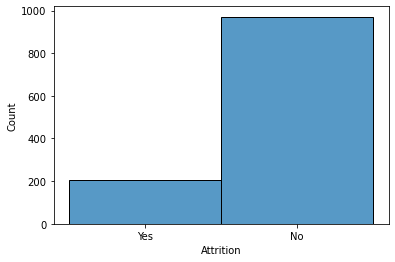

In [8]:
sb.histplot(x="Attrition", data=employee_attr)

It is clear that there are considerably more records where the Attrition is No. With No being around 1000 and Yes being just around 200.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

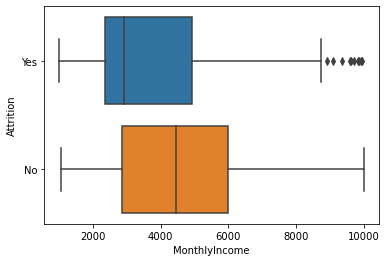

In [9]:
sb.boxplot(x="MonthlyIncome", y="Attrition", data=employee_attr)

It looks like there is more Attrition when the MonthlyIncome is lower than when MonthlyIncome is higher. MonthlyIncome could have a relation with Attrition. This could be due to employees leaving because they feel underpaid or having found a better financial situation at another job.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>

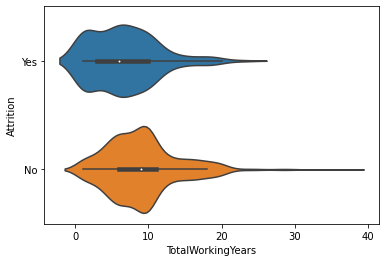

In [10]:
sb.violinplot(x="TotalWorkingYears", y="Attrition", data=employee_attr)

Attrition seems to be more common when there is a low amount of years worked with Yes having most employees working 3 to 10 years and No having most employees working 7 to 10 years. It could be that employees who have worked for longer are less likely to leave and cause Attrition.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Attrition'>

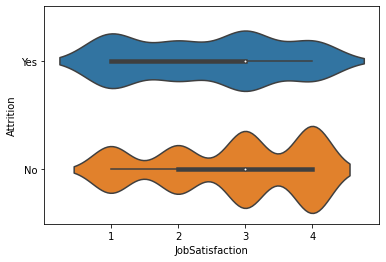

In [11]:
sb.violinplot(x="JobSatisfaction", y="Attrition", data=employee_attr)

It looks like when JobSatisfaction is high (3 and 4) less Attrition is present. There also seems that some Attrtion is present when the satisfaction level is 3 but a little lower than No Attrition. It seems logical that when someone is satisfied with his job he's less likely to leave.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Attrition'>

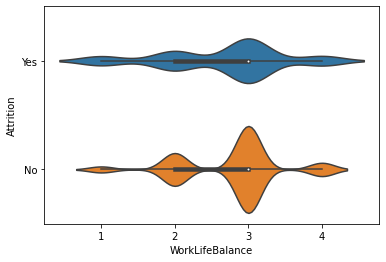

In [12]:
sb.violinplot(x="WorkLifeBalance", y="Attrition", data=employee_attr)

The most employees who are not attrited seem to have a WorkLifeBalance of 3. There also seem to be a lot of employees who have attrited that have a WorkLifebalance of 3, but it's less than thos who have not attrited. This once again seems quite logical. I would even say that there is a correlation between JobSatisfaction and WorkLifeBalance.

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

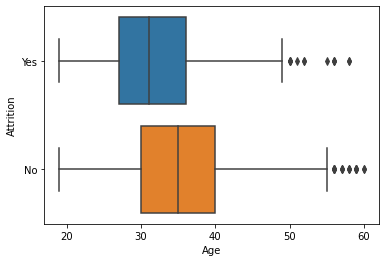

In [13]:
sb.boxplot(x="Age", y="Attrition", data=employee_attr)

It looks like younger employees are more likely to cause Attrition opposed to older employees. This could be because younger people are more flexible in where they can/want to work and older people are less likely to leave because they are comfortable at their job. it could also be that older people do not leave because it might be harder for them to be rehired at another place due to age discrimination.

# Prediction

Now that we have done our exploratory work its time to predict our variable Attrition. Let's first split our dataset into train and test data.

In [14]:
x = employee_attr.loc[:, employee_attr.columns != "Attrition"]
y = employee_attr["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

I've decided to use RandomForest for this prediction. RandomForest is a supervised machine learning algorithm that is used for classification and regression problems. The RandomForest creates decision trees based on various samples and then takes the majority vote for classification, or the average in case of regression. However it performs better when used for classification problems.

In [28]:
rf = RandomForestClassifier(random_state=10, n_estimators=100)
rf = rf.fit(x_train, y_train)

Now that we fitted the model let's see how accurate the model is.

In [29]:
rf.score(x_test, y_test)

0.8135593220338984

The model seems to predict with an accuracy of 81% which is not that bad.

# Evaluation

Let's evaluate the model using a confusion matrix to calculate the precision, recall and accuracy.

In [30]:
rf.classes_

array(['No', 'Yes'], dtype=object)

The labels are No and Yes accordingly. Let's perform our prediction and create the confusion matrix.

In [31]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=["No Attrition (actual)", "Attrition (actual)"], columns=["No Attrition (pred)", "Attrition (pred)"])
cm

,No Attrition (pred),Attrition (pred)
No Attrition (actual),275,9
Attrition (actual),57,13


In [32]:
13/22

0.5909090909090909

We can see from our confusion matrix that it detects negative Attrition reasonably well. It detects positive Attrition less well though.

Let's take a look at the classification report to gain some better insights.

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.97      0.89       284
         Yes       0.59      0.19      0.28        70

    accuracy                           0.81       354
   macro avg       0.71      0.58      0.59       354
weighted avg       0.78      0.81      0.77       354



# Conclusion

From the classification report we can see that the precision for Attrition is decent at best. At least 41% cases of Attrition turn out not to have Attrition at all.

The recall is very bad. We miss around 81% of Attrition cases.

The model seems to have difficulty deciding wheter a case of Attrition is positive or negative, resulting in the low precision and low recall of the positive cases. It detects negative Attrition cases with much more precision and recall.